# A5-Q4Q5: DCT and JPEG Compression

In [316]:
import numpy as np
import matplotlib.pyplot as plt

## Q4: Discrete Cosine Transform

### Some helper functions

In [317]:
def EvenExtension(f):
    '''
     fe = EvenExtension(f)
     
     Performs an even extension on the array f.
    
     Input:
       f is a 2D array
    
     Output:
       fe is the even extension of f
    
     If f has dimensions NxM, then fe has dimensions
        (2*N-2)x(2*M-2)
     and fe[n,j]=fe[-n,j] for n=0,...,N-1
     and fe[n,j]=fe[n,-j] for j=0,...,M-1
    
     For example, if f is 5x4, then fe has dimensions 8x6.
    
     IEvenExtension is the inverse of EvenExtension, so that
        IEvenExtension(EvenExtension(f)) == f
     for any matrix f.
    
    '''
    fe = np.concatenate((f,np.fliplr(f[:,1:-1])), axis=1)
    fe = np.concatenate((fe, np.flipud(fe[1:-1,:])), axis=0)
    
    return fe

def IEvenExtension(fe):
    '''
     f = IEvenExtension(fe)
    
     Reverses the action of an even extension.
    
     Input:
       fe is a 2D array, assumed to contain an even extension
    
     Output:
       f is the sub-array that was used to generate the extension
    
     If fe has dimensions KxL, then f has dimensions
        ceil((K+1)/2) x ceil((L+1)/2)
     For example, if fe is 8x6, then f is 5x4.
    
     IEvenExtension is the inverse of EvenExtension, so that
        IEvenExtension(EvenExtension(f)) == f
     for any matrix f.
    
    '''
    e_dims = np.array(np.shape(fe))
    dims = np.ceil((e_dims+1.)/2)
    dims = np.array(dims, dtype=int)
    f = fe[:dims[0], :dims[1]]
    #f = fe(1:dims(1),1:dims(2));
    return f

In [318]:
# Define a simple 2-D array to play with
f = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(f)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [319]:
# Even extension
fe = EvenExtension(f)
print(fe)

[[ 1  2  3  4  3  2]
 [ 5  6  7  8  7  6]
 [ 9 10 11 12 11 10]
 [ 5  6  7  8  7  6]]


In [320]:
# Check that it's even, if you don't believe me
n = np.random.randint(np.shape(f)[0])
j = np.random.randint(np.shape(f)[1])
print((n,j))
print(fe[n,j])
print(fe[-n,-j])

(2, 2)
11
11


In [321]:
# Inverse even extension
g = IEvenExtension(fe)
print(g)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


### `myDCT`

In [322]:
def myDCT(f):
    '''
     Fdct = myDCT(f)
    
     Computes the 2-D Discrete Cosine Transform of input image f.
     It uses an even extension of f, along with the 2D-DFT.
     This function is the inverse of myIDCT.
    
     Input:
      f is a 2-D array of real values
    
     Output:
      Fdct is a real-valued array the same size as f
    '''
    
    # ==== YOUR CODE HERE ====
    g = EvenExtension(f)
    G = np.fft.fft2(g)
    Fdct = IEvenExtension(G)
    
    
    return np.real(Fdct)

In [323]:
myDCT(f)

array([[156., -16.,   0.,  -4.],
       [-48.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.]])

### `myIDCT`

In [324]:
def myIDCT(Fdct):
    '''
     f = myIDCT(Fdct)
    
     Computes the 2-D Inverse Discrete Cosine Transform (IDCT) of input
     array Fdct. It uses an even extension of Fdct, along with the 2D-IDFT.
     This function is the inverse of myDCT.
    
     Input:
      Fdct is a 2-D array of real values
    
     Output:
      f is a real-valued array the same size as Fdct
    '''
    # ==== YOUR CODE HERE ====
    G = EvenExtension(Fdct)
    g = np.fft.ifft2(G)
    f = IEvenExtension(g)
    
    return np.real(f)

In [325]:
myIDCT(myDCT(f))

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.]])

## Q5: JPEG Compression

In [326]:
# A couple functions to help you
def NumPixels(f):
    '''
     n = NumPixels(f) returns the total number of elements in the array f.
     
     For example,
       NumPixels( np.ones((5,4)) )
     returns the value 20.
    '''
    return np.prod(np.shape(f))

def Show(g, title=''):
    '''
     Show(g, title='')
     
     Displays the image g as a graylevel image with intensities
     clipped to the range [0,255].
    '''
    plt.imshow(np.clip(g, a_min=0, a_max=255), cmap='gray');
    plt.axis('off');
    plt.title(title);

### `myJPEGCompress`

In [327]:
def myJPEGCompress(f, T, D):
    '''
     G = myJPEGCompress(f, T, D)
    
     Input
        f is the input image, a 2D array of real numbers
        T is the tile size to break the input image into
        D is the size of the block of Fourier coefficients to keep
          (Bigger values of D result in less loss, but less compression)
    
     Output
        G is the compressed encoding of the image
    
     Example: If f is 120x120, then
    
        G = myJPEGCompress(f, 10, 4)
    
     would return an array (G) of size 48x48.
    '''
    
    h,w = np.shape(f)  # returns the width and height of f
    G = np.zeros( (int(np.floor(h/T)*D), int(np.floor(w/T)*D)) ) # this is not guaranteed to be the right size
    
    # ==== YOUR CODE HERE ====
    innerG = []
    firstTile = True
    firstMatrix = True
    for i in range(int(h/T)):
        for j in range(int(w/T)):
            Tile = f[T*i:T*(i+1),T*j:T*(j+1)]
            Tile = myDCT(Tile)
            Dtile = Tile[0:D,0:D]
            G[D*i:D*(i+1),D*j:D*(j+1)]=Dtile
        
    return G

In [328]:
res = []
for i in range(10):
    res.append(np.arange(10*i, 10*(i+1)))

res = np.array(res)

compressed = myJPEGCompress(res, 5, 2)
print(compressed)

[[1408.          -54.627417   1728.          -54.627417  ]
 [-546.27416998    0.         -546.27416998    0.        ]
 [4608.          -54.627417   4928.          -54.627417  ]
 [-546.27416998    0.         -546.27416998    0.        ]]


### `myJPEGDecompress`

In [329]:
def myJPEGDecompress(G, T, D):
    '''
     f = myJPEGDecompress(G, T, D)
    
     Input
        G is the compressed encoding, a 2D array of real numbers
        T is the tile size for reassembling the decompressed image
        D is the size of the blocks of Fourier coefficients that were
          kept when the image was compressed
          (Bigger values of D result in less loss, but less compression)
    
     Output
        f is the decompressed, reconstructed image
    
     Example: If G is 48x48, then
    
        f = myJPEGDecompress(G, 10, 4);
    
     would return an array (f) of size 120x120.
    '''
    n_hblocks = int( np.shape(G)[0]/D )
    n_wblocks = int( np.shape(G)[1]/D )
    
    
    f = np.zeros( (T*n_hblocks, T*n_wblocks) )
    
    # ==== YOUR CODE HERE ====
    for i in range(n_hblocks):
        for j in range(n_wblocks):
            Tile = G[D*i:D*(i+1), D*j:D*(j+1)]
            Ttile = np.zeros((T,T))
            Ttile[0:D, 0:D] = Tile
            f[T*i:T*(i+1),T*j:T*(j+1)]=myIDCT(Ttile)

    return f

In [330]:
myJPEGDecompress(compressed, 5, 2)

array([[ 3.22182541,  3.72182541,  4.92893219,  6.13603897,  6.63603897,
         8.22182541,  8.72182541,  9.92893219, 11.13603897, 11.63603897],
       [ 8.22182541,  8.72182541,  9.92893219, 11.13603897, 11.63603897,
        13.22182541, 13.72182541, 14.92893219, 16.13603897, 16.63603897],
       [20.29289322, 20.79289322, 22.        , 23.20710678, 23.70710678,
        25.29289322, 25.79289322, 27.        , 28.20710678, 28.70710678],
       [32.36396103, 32.86396103, 34.07106781, 35.27817459, 35.77817459,
        37.36396103, 37.86396103, 39.07106781, 40.27817459, 40.77817459],
       [37.36396103, 37.86396103, 39.07106781, 40.27817459, 40.77817459,
        42.36396103, 42.86396103, 44.07106781, 45.27817459, 45.77817459],
       [53.22182541, 53.72182541, 54.92893219, 56.13603897, 56.63603897,
        58.22182541, 58.72182541, 59.92893219, 61.13603897, 61.63603897],
       [58.22182541, 58.72182541, 59.92893219, 61.13603897, 61.63603897,
        63.22182541, 63.72182541, 64.92893219

### Demonstrate Compression

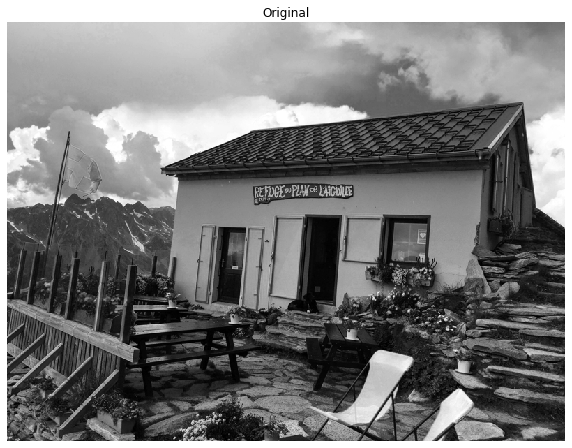

In [331]:
f = plt.imread('Swiss_refuge.jpg')[:,:,0]
plt.figure(figsize=[10,10])
Show(f, 'Original')

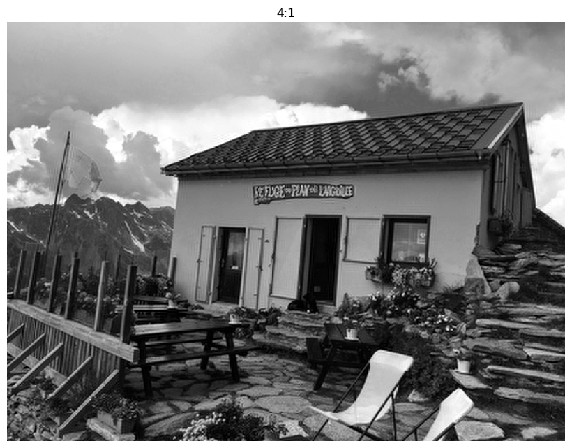

In [337]:
# ==== YOUR CODE HERE ====
G = myJPEGCompress(f, 20, 10)
newf = myJPEGDecompress(G, 20, 10)
plt.figure(figsize=[10,10])
Show(newf, '4:1')

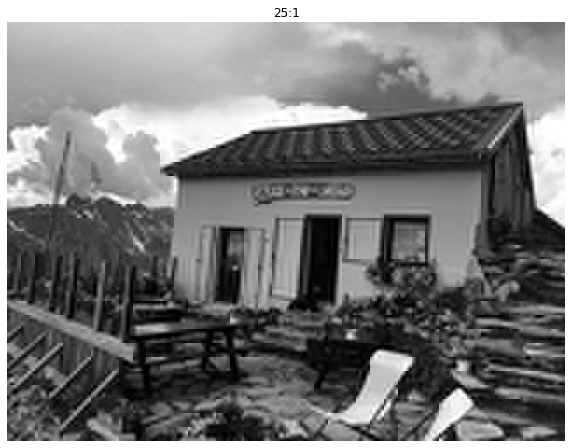

In [333]:
G = myJPEGCompress(f, 20, 4)
newf = myJPEGDecompress(G, 20, 4)
plt.figure(figsize=[10,10])
Show(newf, '25:1')

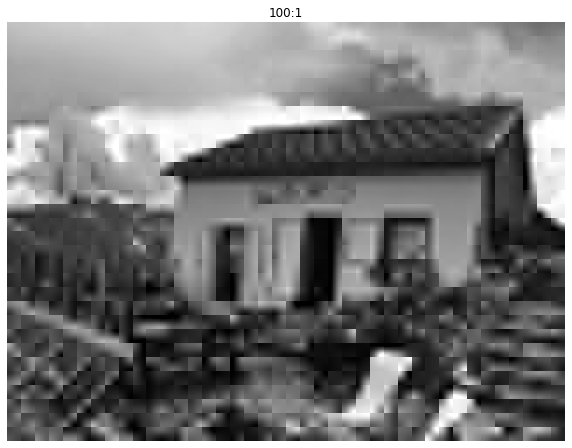

In [334]:
G = myJPEGCompress(f, 20, 2)
newf = myJPEGDecompress(G, 20, 2)
plt.figure(figsize=[10,10])
Show(newf, '100:1')